<a href="https://colab.research.google.com/github/Husseinmdarman/AI_core_practicals/blob/main/practical_sql_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import psycopg2
from sqlalchemy import create_engine
import pandas as pd

  Q1. Create two dataframes with the data you downloaded

In [ ]:
samuel_movies_df = pd.read_csv('samuel_movies.csv')
tim_movies_df = pd.read_csv('tim_movies.csv')
print(samuel_movies_df.head())
print(tim_movies_df.head())

                  Title  Year
0                  1408  2007
1   Any Given Wednesday  2000
2               Argylle  2022
3          Pulp Fiction  1994
4  QT8: The First Eight  2019
              Title  Year
0     1 Mile to You  2017
1         600 Miles  2015
2  A Backyard Story  2010
3     A Fuller Life  2013
4     A World Apart  1988


Q2. for each dataframe, and using SQLAlchemy, create a new table in your database with the following columns:
title: String
year: Integer
Name the tables samuel_movies and tim_movies accordingly

In [ ]:
DATABASE_TYPE = 'postgresql'
DBAPI = 'psycopg2'
USER = 'postgres'
PASSWORD = 'Barcemo123'
HOST = 'localhost'
DATABASE = 'Pagila'
PORT = 5432

In [ ]:
connection_string = create_engine(f"{DATABASE_TYPE}+{DBAPI}://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}")

In [ ]:
samuel_movies_df.to_sql(name ='samuel_movies',con = connection_string, if_exists ='replace')
tim_movies_df.to_sql(name ='tim_movies',con = connection_string, if_exists ='replace')

91

Q2. Create a new table named Common containing the films where Samuel L. Jackson AND Tim Roth both had a role

In [ ]:
common_films_sam_tim = pd.merge(samuel_movies_df,tim_movies_df, how='inner', on=['Title'], suffixes= [' Samuel', ' Tim'])

In [ ]:
common_films_sam_tim.to_sql(name ='common',con = connection_string, if_exists ='replace')

5

Q3.Create a new table named Only_Samuel containing the films where Samuel L. Jackson had a role but Tim Roth didn't

In [ ]:
role_samuel_not_tim = samuel_movies_df.loc[~samuel_movies_df['Title'].isin(tim_movies_df['Title'])].copy()
role_samuel_not_tim.head()

,Title,Year
0,1408,2007
1,Any Given Wednesday,2000
2,Argylle,2022
3,Pulp Fiction,1994
5,Quantum Quest: A Cassini Space Odyssey,2010


In [ ]:
role_samuel_not_tim.to_sql(name ='samuel_role_not_tim',con = connection_string, if_exists ='replace')

174

Q4. Create a new table named Only_Tim containing the films where Tim Roth had a role but Samuel L. Jackson didn't

In [ ]:
role_tim_not_samuel = tim_movies_df.loc[~tim_movies_df['Title'].isin(samuel_movies_df['Title'])].copy()
role_tim_not_samuel.head()

,Title,Year
0,1 Mile to You,2017
1,600 Miles,2015
3,A Fuller Life,2013
4,A World Apart,1988
5,Animals with the Tollkeeper,1998


In [ ]:
role_tim_not_samuel.to_sql(name ='tim_role_not_samuel',con = connection_string, if_exists ='replace')

86

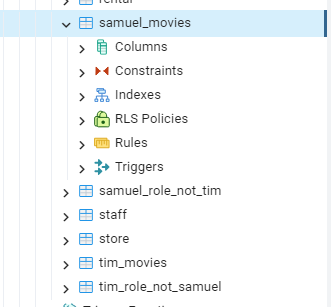 Has been successfully added to the database